In [29]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def aplica_gauss_e_otsu(pastaOrigem, pastaDestino):
    arq = os.listdir(pastaOrigem)

    for i in arq:
        #verificando se o que está sendo lido é uma imagem desejada
        if i.lower().startswith(('cgtoll10b')):
            caminho_origem = os.path.join(pastaOrigem, i)
            img = cv2.imread(caminho_origem, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Erro ao ler a imagem: {caminho_origem}")
            else:
                print(f"Imagem lida com sucesso: {caminho_origem}")

                gaussiana = cv2.GaussianBlur(img, (3, 3), 1)
                _, otsu = cv2.threshold(gaussiana, 175, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

                cv2.imwrite(os.path.join(pastaDestino, f"{i}"), otsu)

In [34]:
def contorna_bordas(img):
    edged = cv2.Canny(img, 30, 200) 
    contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    print("Numero de contornos: ", len(contours))
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3) 


Imagem lida com sucesso: C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B\CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series009_z0_ch00.tif
Imagem lida com sucesso: C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B\CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series009_z0_ch01.tif
Imagem lida com sucesso: C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B\CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series009_z0_ch02.tif
Imagem lida com sucesso: C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B\CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series011_z0_ch00.tif
Imagem lida com sucesso: C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B\CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series011_z0_ch01.tif
Imagem lida com suce

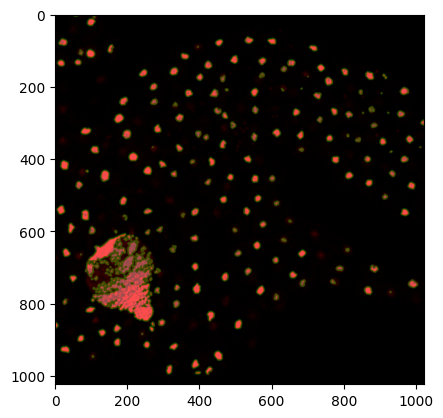

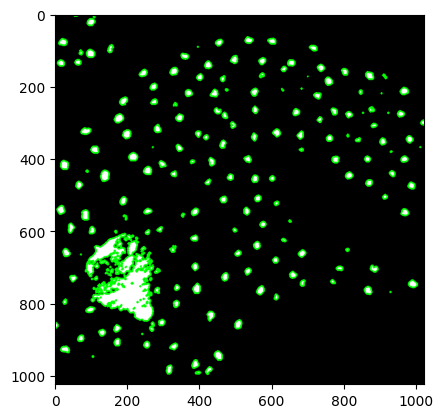

In [56]:
def sobrepoe_imagens(pastaLimiarizadas, pastaOriginais):
    img_originais = os.listdir(pastaOriginais)
    img_limiarizadas = os.listdir(pastaLimiarizadas)
    for img in img_originais:
        for i in img_limiarizadas:
            if(img.)



Imagem lida com sucesso: C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B\CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series009_z0_ch00.tif
Imagem lida com sucesso: C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B\CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series009_z0_ch01.tif
Imagem lida com sucesso: C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B\CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series009_z0_ch02.tif
Imagem lida com sucesso: C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B\CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series011_z0_ch00.tif
Imagem lida com sucesso: C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B\CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series011_z0_ch01.tif
Imagem lida com suce

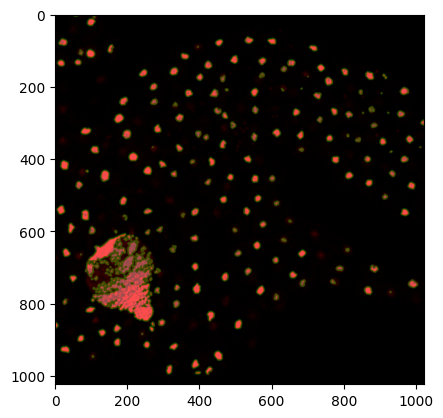

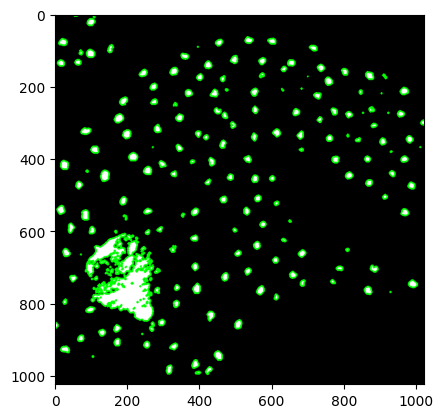

In [57]:
pasta_origem = "C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/CgToll10B"

pasta_destino = "C:/Users/lazar/OneDrive/Documentos/Iniciacao Cientifica/Processamento-Digital-De-Imagens/suavizacao_e_otsu"

aplica_gauss_e_otsu(pasta_origem, pasta_destino)

img = cv2.imread("suavizacao_e_otsu/CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series011_z0_ch00.tif", cv2.IMREAD_GRAYSCALE)

img2 = cv2.imread("CgToll10B_RabbitTube546_ Dorsal647_03_06_2019.lif_Series011_z0_ch00.tif", cv2.COLOR_GRAY2RGB)

imagem_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
contorna_bordas(imagem_rgb)

print(imagem_rgb.shape)
print(img2.shape)
if imagem_rgb.shape == img2.shape:
    alpha = 0.7
    newImg = cv2.addWeighted(imagem_rgb, 1 - alpha, img2, alpha, 0)

    # Exibir a imagem usando matplotlib
    plt.imshow(newImg, cmap='gray')
    plt.show()
else:
    print("Erro: As dimensões das imagens não correspondem.")

plt.imshow(imagem_rgb)

In [ ]:
#OBS: Antes de chamar a função responsável pro traçar os contornos, eu converti a imagem limiarizada para rgb, pois o contorno a ser desenhado tem suas bordas verdes, cor essa q não seria possível visualizar em uma imagem binária.